In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Welcome to JupyROOT 6.28/00


In [2]:
date = "JUN29"

chain = ROOT.TChain("events")
chain.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1039_GFcat_Phi3Cat_2018.root".format(date))
df_SGN = ROOT.RDataFrame(chain)

In [3]:
df_SGN = df_SGN.Define("scale", "w*lumiIntegrated")\
            .Define("goodMeson_ditrk_mass_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 333, 25)[3]")\
            .Define("goodMeson_ditrk_eta_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 333, 25)[1]")\
            .Define("goodMeson_ditrk_phi_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 333, 25)[2]")\
            .Define("goodMeson_ditrk_pt_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 333, 25)[0]")\
            .Define("goodMeson_leadtrk_pt_GEN", "getMaximum(getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 333, 25), getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -211, 333, 25))")\
            .Define("goodMeson_subleadtrk_pt_GEN", "getMinimum(getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 333, 25), getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -211, 333, 25))")\
            .Define("goodPhotons_pt_GEN", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)")\
            .Define("goodMeson_DR_GEN", "getDR(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, -211, 333, 25, 211, 333, 25)")\
            .Define("goodMeson_mass_GEN", "get3BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 111, 333, 25)[3]")\
            .Define("goodMeson_pt_GEN", "get3BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 111, 333, 25)[0]")\
            .Define("HCandMass_GEN", "getHiggsPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, 333, 25, 22, 25)[3]")\
            .Define("HCandMassMissing", "compute_HiggsVars_var(goodMeson_ditrk_pt[0],goodMeson_ditrk_eta[0],goodMeson_ditrk_phi[0],goodMeson_ditrk_mass[0],photon_pt,goodPhotons_eta[index_pair[1]],goodPhotons_phi[index_pair[1]],0)")\
            .Define("HCandMassMissing_GEN", "getHiggsPtEtaPhiMPhi3Ditrack(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother)[3]")\
            .Define("goodMeson_ditrk_pt_sum", "sum2Body(goodMeson_trk1_pt[0], goodMeson_trk1_eta[0], goodMeson_trk1_phi[0], pi1_mass, goodMeson_trk2_pt[0], goodMeson_trk2_eta[0], goodMeson_trk2_phi[0], pi1_mass).Pt()")\
            .Define("goodMeson_ditrk_eta_sum", "sum2Body(goodMeson_trk1_pt[0], goodMeson_trk1_eta[0], goodMeson_trk1_phi[0], pi1_mass, goodMeson_trk2_pt[0], goodMeson_trk2_eta[0], goodMeson_trk2_phi[0], pi1_mass).Eta()")\
            .Define("goodMeson_ditrk_phi_sum", "sum2Body(goodMeson_trk1_pt[0], goodMeson_trk1_eta[0], goodMeson_trk1_phi[0], pi1_mass, goodMeson_trk2_pt[0], goodMeson_trk2_eta[0], goodMeson_trk2_phi[0], pi1_mass).Phi()")\
            .Define("goodMeson_ditrk_mass_sum", "sum2Body(goodMeson_trk1_pt[0], goodMeson_trk1_eta[0], goodMeson_trk1_phi[0], pi1_mass, goodMeson_trk2_pt[0], goodMeson_trk2_eta[0], goodMeson_trk2_phi[0], pi1_mass).M()")\
            .Define("Diff_pt_original", "(goodMeson_ditrk_pt[0]-goodMeson_ditrk_pt_GEN)/goodMeson_ditrk_pt_GEN")\
            .Define("Diff_pt_sum", "(goodMeson_ditrk_pt_sum-goodMeson_ditrk_pt_GEN)/goodMeson_ditrk_pt_GEN")\
            .Define("Diff_eta_original", "(goodMeson_ditrk_eta[0]-goodMeson_ditrk_eta_GEN)/goodMeson_ditrk_eta_GEN")\
            .Define("Diff_eta_sum",     "(goodMeson_ditrk_eta_sum-goodMeson_ditrk_eta_GEN)/goodMeson_ditrk_eta_GEN")\
            .Define("Diff_phi_original", "(goodMeson_ditrk_phi[0]-goodMeson_ditrk_phi_GEN)/goodMeson_ditrk_phi_GEN")\
            .Define("Diff_phi_sum",     "(goodMeson_ditrk_phi_sum-goodMeson_ditrk_phi_GEN)/goodMeson_ditrk_phi_GEN")\
            .Define("Diff_mass_original", "(goodMeson_ditrk_mass[0]-goodMeson_ditrk_mass_GEN)/goodMeson_ditrk_mass_GEN")\
            .Define("Diff_mass_sum",     "(goodMeson_ditrk_mass_sum-goodMeson_ditrk_mass_GEN)/goodMeson_ditrk_mass_GEN")

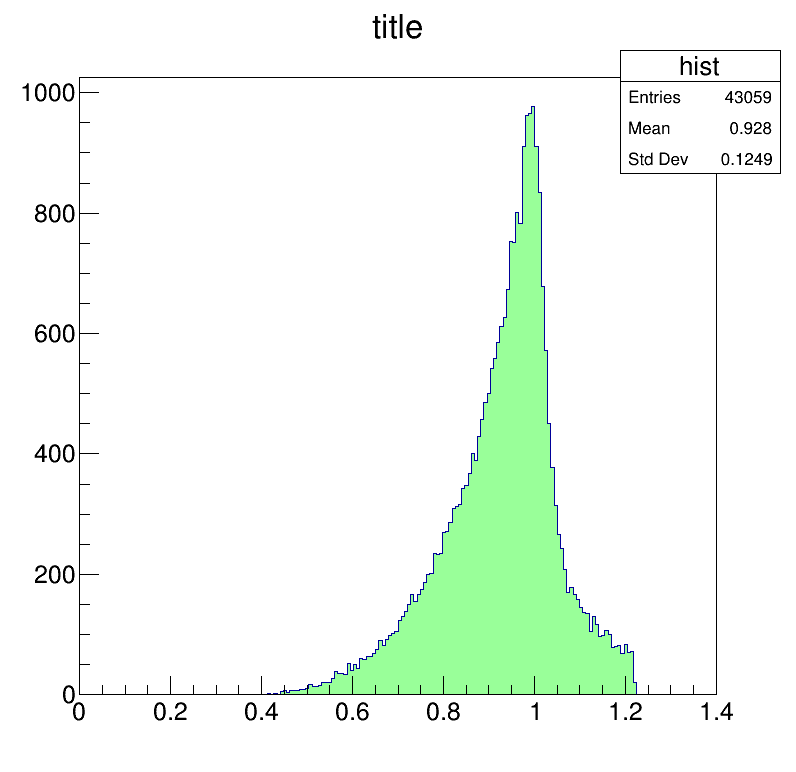

In [4]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 800)

nbins, xlow, xhigh = 200, 0, 1.4

h = df_SGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_mass", "scale")
h.SetFillColor(ROOT.kGreen-9)
h.Draw("hist")

canvas.Draw()

(69.75,-1.66797,-2.375,0.13957)(77.5,-1.66797,-2.375,0.13957)
-50.2394 -48.3845 -178.307 191.464 191.464 0.13957
-55.8216 -53.7606 -198.119 212.738 212.738 0.13957
-106.061 -102.145 -376.427 404.203
-106.061 -102.145 -376.427 404.203 404.203 0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


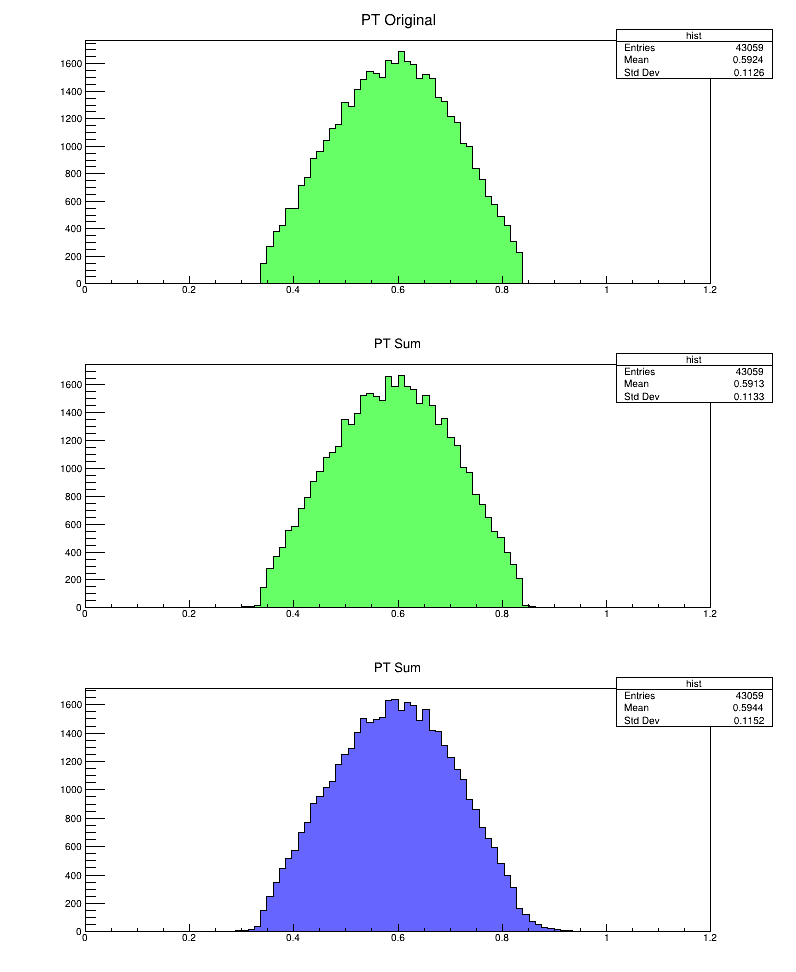

In [5]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 1000)

canvas.Divide(1, 3)

bins, xlow, xhigh = 100, 0.0, 1.2
var = "mass"

h_original = df_SGN.Histo1D(("hist", "PT Original", bins, xlow, xhigh), "goodMeson_ditrk_{}".format(var))

h_sum = df_SGN.Histo1D(("hist", "PT Sum", bins, xlow, xhigh), "goodMeson_ditrk_{}_sum".format(var))

h_gen = df_SGN.Histo1D(("hist", "PT Sum", bins, xlow, xhigh), "goodMeson_ditrk_{}_GEN".format(var))


h_original.SetFillColor(ROOT.kGreen-7)
h_original.SetLineColor(ROOT.kBlack)
h_sum.SetFillColor(ROOT.kGreen-7)
h_sum.SetLineColor(ROOT.kBlack)
h_gen.SetFillColor(ROOT.kBlue-7)
h_gen.SetLineColor(ROOT.kBlack)

canvas.cd(1)
h_original.Draw("hist")
canvas.cd(2)
h_sum.Draw("hist")
canvas.cd(3)
h_gen.Draw("hist")


canvas.Draw()

,Diff_mass_original,Diff_mass_sum
0,0.050106,0.066004
1,0.044140,0.042391
2,0.047533,0.046810
3,0.019941,0.027302
4,-0.000973,-0.002262
...,...,...
43054,0.002816,0.004575
43055,-0.041786,-0.037075
43056,0.001000,0.000231
43057,-0.019528,-0.015557


inf
Original:  inf
Sum:  inf
(69.75,-1.66797,-2.375,0.13957)(77.5,-1.66797,-2.375,0.13957)
-50.2394 -48.3845 -178.307 191.464 191.464 0.13957
-55.8216 -53.7606 -198.119 212.738 212.738 0.13957
-106.061 -102.145 -376.427 404.203
-106.061 -102.145 -376.427 404.203 404.203 0
(69.75,-1.66797,-2.375,0.13957)(77.5,-1.66797,-2.375,0.13957)
-50.2394 -48.3845 -178.307 191.464 191.464 0.13957
-55.8216 -53.7606 -198.119 212.738 212.738 0.13957
-106.061 -102.145 -376.427 404.203
-106.061 -102.145 -376.427 404.203 404.203 0
(69.75,-1.66797,-2.375,0.13957)(77.5,-1.66797,-2.375,0.13957)
-50.2394 -48.3845 -178.307 191.464 191.464 0.13957
-55.8216 -53.7606 -198.119 212.738 212.738 0.13957
-106.061 -102.145 -376.427 404.203
-106.061 -102.145 -376.427 404.203 404.203 0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


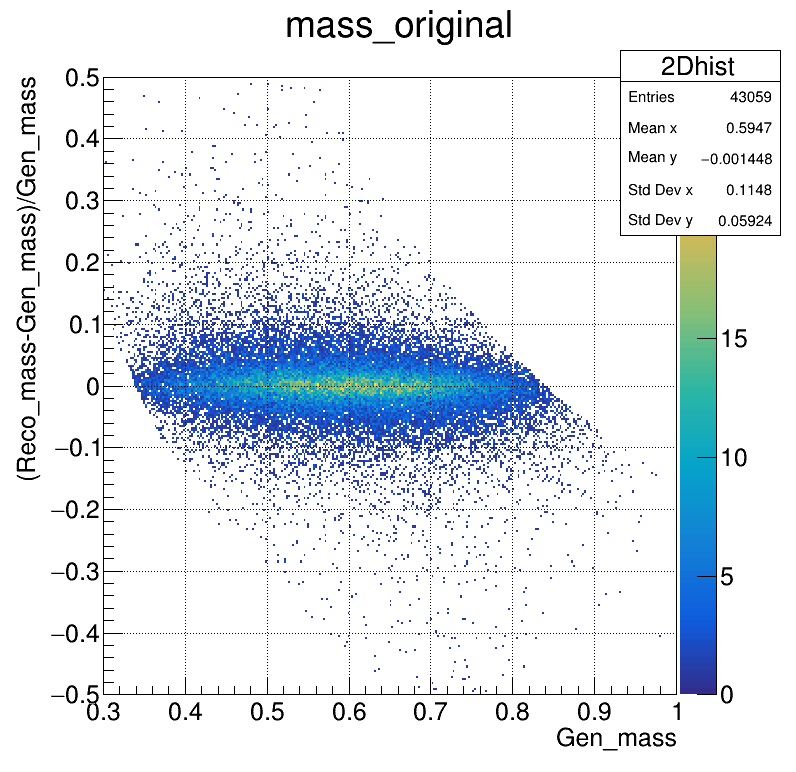

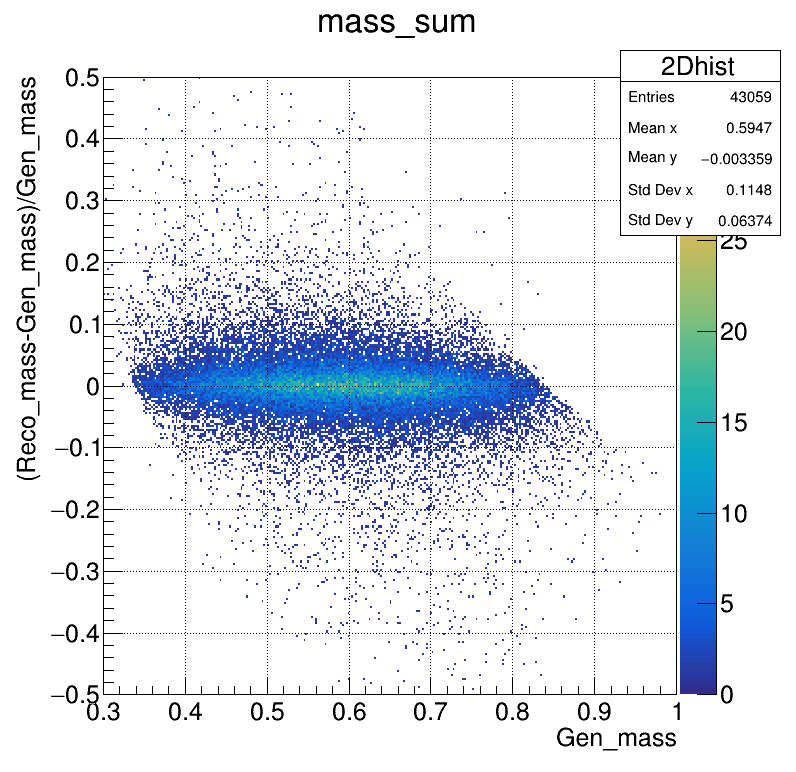

In [6]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 800)

nbins, xlow, xhigh, ylow, yhigh = 300, 0.3, 1.0, -0.5, 0.5

var = "mass"
meth = "original"

h = df_SGN.Histo2D(("2Dhist", var + "_" + meth, nbins, xlow, xhigh, nbins, ylow, yhigh), "goodMeson_ditrk_{}_GEN".format(var), "Diff_{}_{}".format(var, meth))

h.GetXaxis().SetTitle("Gen_{0}".format(var))
h.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h.GetZaxis().SetTitle("Events")
canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)

h.SetContour(100)
h.Draw("colz")
canvas.SetGrid()

canvas.Draw()

canvas2 = ROOT.TCanvas("canvas2", "canvas2", 800, 800)

meth = "sum"

h2 = df_SGN.Histo2D(("2Dhist", var + "_" + meth, nbins, xlow, xhigh, nbins, ylow, yhigh), "goodMeson_ditrk_{}_GEN".format(var), "Diff_{}_{}".format(var, meth))

h2.GetXaxis().SetTitle("Gen_{0}".format(var))
h2.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h2.GetZaxis().SetTitle("Events")
canvas2.SetRightMargin(0.15)
canvas2.SetLeftMargin(0.13)

h2.SetContour(100)
h2.Draw("colz")
canvas2.SetGrid()

canvas2.Draw()


cols = ["Diff_{}_original".format(var), "Diff_{}_sum".format(var)]
x = df_SGN.AsNumpy(columns=cols)
pddf = pd.DataFrame(x)

display(pddf)

orig = pddf["Diff_{}_original".format(var)].to_numpy()
print(np.max(orig))
summed = pddf["Diff_{}_sum".format(var)].to_numpy()
print("Original: ", np.sqrt(np.sum(orig**2)/len(orig)))
print("Sum: ", np.sqrt(np.sum(summed**2)/len(summed)))





In [28]:
cols = ["goodMeson_pt", "goodMeson_mass", "goodMeson_ditrk_pt", "goodMeson_ditrk_mass", "goodMeson_ditrk_pt_sum", "goodMeson_ditrk_mass_sum", "goodMeson_Nphotons", "goodMeson_photons_pt", "goodMeson_photons_eta", "goodMeson_photons_phi", "goodMeson_ditrk_eta_sum", "goodMeson_ditrk_phi_sum", "goodMeson_eta", "goodMeson_phi"]

x = df_SGN.AsNumpy(columns=cols)

pddf = pd.DataFrame(x)

#display(pddf[(pddf["goodMeson_mass"] == 0) & (pddf["goodMeson_ditrk_pt_GEN2"]>0)])
#display(pddf[(pddf["goodMeson_ditrk_pt_GEN2"] != pddf["goodMeson_ditrk_pt_GEN"])])
#display(pddf[(pddf["goodMeson_mass"] == 0)])
pddf["goodMeson_mass"] = pddf["goodMeson_mass"].apply(lambda x: x[0])
pddf["goodMeson_eta"] = pddf["goodMeson_eta"].apply(lambda x: x[0])
pddf["goodMeson_phi"] = pddf["goodMeson_phi"].apply(lambda x: x[0])
pddf["goodMeson_pt"] = pddf["goodMeson_pt"].apply(lambda x: x[0])
pddf["goodMeson_Nphotons"] = pddf["goodMeson_Nphotons"].apply(lambda x: x[0])

pddf["Sum"] = pddf.apply(lambda row: ROOT.sum2Body(row["goodMeson_ditrk_pt_sum"], row["goodMeson_ditrk_eta_sum"], row["goodMeson_ditrk_phi_sum"],\
                                                row["goodMeson_ditrk_mass_sum"], row["goodMeson_photons_pt"][0], row["goodMeson_photons_eta"][0],\
                                                row["goodMeson_photons_phi"][0], 0.0), axis=1)

pddf["SumPT"] = pddf["Sum"].apply(lambda x: x.pt())
pddf["SumEta"] = pddf["Sum"].apply(lambda x: x.Eta())
pddf["SumPhi"] = pddf["Sum"].apply(lambda x: x.Phi())
pddf["SumMass"] = pddf["Sum"].apply(lambda x: x.M())

#pddf['goodMeson_Nphotons'] = pddf['goodMeson_Nphotons'].apply(lambda x: x[0])
temp = pddf[(pddf["goodMeson_mass"] > 0) & (abs(pddf["goodMeson_mass"] - pddf["SumMass"]) < 0.00001) & (pddf["goodMeson_Nphotons"] == 1)]
display(temp)
#display(pddf[(pddf["goodMeson_mass"] > 0) & (pddf["goodMeson_Nphotons"] > 1)])
print(len(temp)/410.58)

,goodMeson_pt,goodMeson_mass,goodMeson_ditrk_pt,goodMeson_ditrk_mass,goodMeson_ditrk_pt_sum,goodMeson_ditrk_mass_sum,goodMeson_Nphotons,goodMeson_photons_pt,goodMeson_photons_eta,goodMeson_photons_phi,goodMeson_ditrk_eta_sum,goodMeson_ditrk_phi_sum,goodMeson_eta,goodMeson_phi,Sum,SumPT,SumEta,SumPhi,SumMass
161,48.115746,1.206754,[34.10948181152344],[0.6342431306838989],34.109341,0.635123,1,[14.015625],[-0.6159855723381042],[1.2525780200958252],-0.616668,1.209494,-0.616575,1.222040,"(48.1157,-0.616575,1.22204,1.20675)",48.115746,-0.616575,1.222040,1.206747
169,51.639061,0.979781,[36.58495330810547],[0.46819621324539185],36.584373,0.471865,1,[15.0546875],[-0.9893490672111511],[-0.40831258893013],-0.955172,-0.408081,-0.965226,-0.408148,"(51.6391,-0.965227,-0.408148,0.979776)",51.639061,-0.965227,-0.408148,0.979776
229,39.481323,0.839765,[31.91705894470215],[0.6206322312355042],29.833410,0.579496,1,[9.6484375],[-0.6013367176055908],[-2.868934154510498],-0.573827,-2.880920,-0.580594,-2.877991,"(39.4813,-0.580594,-2.87799,0.839762)",39.481327,-0.580594,-2.877991,0.839762
274,63.997829,0.967380,[28.124536514282227],[0.36500972509384155],28.124517,0.367276,1,[35.875],[0.21625415980815887],[-2.3776113986968994],0.196035,-2.362980,0.207384,-2.371182,"(63.9978,0.207384,-2.37118,0.967379)",63.997833,0.207384,-2.371182,0.967379
412,46.011845,0.899265,[30.934343338012695],[0.5757372379302979],30.934296,0.577055,1,[15.078125],[-0.4189580976963043],[1.2107797861099243],-0.395393,1.221434,-0.403143,1.217942,"(46.0118,-0.403143,1.21794,0.899269)",46.011845,-0.403143,1.217942,0.899269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42751,58.139824,1.080413,[43.13409423828125],[0.8035681247711182],43.134071,0.803751,1,[15.0078125],[0.015198217704892159],[-1.1963249444961548],0.024608,-1.215559,0.022180,-1.210594,"(58.1398,0.0221804,-1.21059,1.08042)",58.139824,0.022180,-1.210594,1.080423
42860,41.507881,0.997199,[27.161659240722656],[0.4925304651260376],27.161697,0.499216,1,[14.3515625],[0.12085329741239548],[-2.4972450733184814],0.100174,-2.531092,0.107342,-2.519391,"(41.5079,0.107342,-2.51939,0.997192)",41.507881,0.107342,-2.519391,0.997192
42926,63.672985,1.047635,[31.4593505859375],[0.4693404734134674],31.459347,0.469132,1,[32.21875],[0.20380260050296783],[0.7371321320533752],0.204687,0.762482,0.204256,0.749656,"(63.673,0.204256,0.749656,1.04763)",63.672981,0.204256,0.749656,1.047625
42974,124.656097,0.763968,[99.10968780517578],[0.6348569393157959],99.109344,0.628169,1,[25.546875],[0.04925687611103058],[2.3581769466400146],0.053972,2.361657,0.053006,2.360944,"(124.656,0.0530059,2.36094,0.763964)",124.656090,0.053006,2.360944,0.763964


1.841297676457694


In [6]:
#dfnew = df_D0Star.Filter("goodMeson_ditrk_pt_GEN  < 35").Filter("goodMeson_ditrk_pt_GEN  > 5")

cols = ["goodMeson_pt", "goodMeson_eta", "goodMeson_phi", "goodMeson_mass", "goodMeson_ditrk_pt", "goodMeson_ditrk_eta", "goodMeson_ditrk_phi", "goodMeson_ditrk_mass", "goodMeson_Nphotons", "goodMeson_photons_pt", "goodMeson_photons_eta", "goodMeson_photons_phi"]

x = df_SGN.AsNumpy(columns=cols)

pddf = pd.DataFrame(x)

#display(pddf[(pddf["goodMeson_mass"] == 0) & (pddf["goodMeson_ditrk_pt_GEN2"]>0)])
#display(pddf[(pddf["goodMeson_ditrk_pt_GEN2"] != pddf["goodMeson_ditrk_pt_GEN"])])
#display(pddf[(pddf["goodMeson_mass"] == 0)])
for e in cols[:4]:
    pddf[e] = pddf[e].apply(lambda x: x[0])


#pddf['goodMeson_Nphotons'] = pddf['goodMeson_Nphotons'].apply(lambda x: x[0])
display(pddf[(pddf["goodMeson_mass"] == 0)])

,goodMeson_pt,goodMeson_eta,goodMeson_phi,goodMeson_mass,goodMeson_ditrk_pt,goodMeson_ditrk_eta,goodMeson_ditrk_phi,goodMeson_ditrk_mass,goodMeson_Nphotons,goodMeson_photons_pt,goodMeson_photons_eta,goodMeson_photons_phi
26,0.0,-99.0,-99.0,0.0,[21.987329483032227],[-0.39841634035110474],[1.0142107009887695],[0.5073749423027039],[2],[-1.0],[0.0],[0.0]
38,0.0,-99.0,-99.0,0.0,[57.390281677246094],[1.1597099304199219],[-2.2030115127563477],[0.6192908883094788],[1],[-1.0],[0.0],[0.0]
44,0.0,-99.0,-99.0,0.0,[47.78782653808594],[0.46112990379333496],[-2.803821086883545],[0.7293917536735535],[1],[-1.0],[0.0],[0.0]
45,0.0,-99.0,-99.0,0.0,[37.85580825805664],[0.37802281975746155],[2.429685115814209],[0.6456540822982788],[2],[-1.0],[0.0],[0.0]
54,0.0,-99.0,-99.0,0.0,[25.81138801574707],[0.14224062860012054],[-1.5779222249984741],[0.5351846218109131],[1],[-1.0],[0.0],[0.0]
...,...,...,...,...,...,...,...,...,...,...,...,...
19286,0.0,-99.0,-99.0,0.0,[38.7965202331543],[0.035781968384981155],[-0.6287145614624023],[0.5726671814918518],[1],[-1.0],[0.0],[0.0]
19294,0.0,-99.0,-99.0,0.0,[24.59137535095215],[0.8607140779495239],[2.448868751525879],[0.45668575167655945],[2],[-1.0],[0.0],[0.0]
19309,0.0,-99.0,-99.0,0.0,[36.537315368652344],[1.2637865543365479],[-2.7849369049072266],[0.5585904717445374],[2],[-1.0],[0.0],[0.0]
19331,0.0,-99.0,-99.0,0.0,[77.9026107788086],[1.4840219020843506],[1.1143079996109009],[0.6726130247116089],[1],[-1.0],[0.0],[0.0]


In [7]:
cols = ["GenPart_pdgId", "GenPart_genPartIdxMother", "GenPart_pt", "GenPart_mass", "GenPart_eta", "GenPart_phi", "goodMeson_ditrk_mass_GEN", "goodMeson_ditrk_pt_GEN", "goodMeson_ditrk_eta_GEN", "goodMeson_ditrk_phi_GEN"]
x = df_SGN.AsNumpy(columns=cols)
pddf = pd.DataFrame(x)

display(pddf[pddf["goodMeson_ditrk_mass_GEN"] < 0.2])

,GenPart_pdgId,GenPart_genPartIdxMother,GenPart_pt,GenPart_mass,GenPart_eta,GenPart_phi,goodMeson_ditrk_mass_GEN,goodMeson_ditrk_pt_GEN,goodMeson_ditrk_eta_GEN,goodMeson_ditrk_phi_GEN
7091,"[2212, 2212, -3, 21, 25, -3, 25, 25, 25, 25, 4...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 8, 0, 0, 9, 5, 1...","[0.0, 0.0, 0.0, 0.0, 344.0, 344.0, 335.0, 300....","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 125.0, ...","[29248.0, -29248.0, 23104.0, -23488.0, -1.2695...","[0.0, 0.0, 0.0, 0.0, -1.6953125, 1.4453125, -2...",0.0,147.25,-1.667969,-2.375


(69.75,-1.66797,-2.375,0.13957)(77.5,-1.66797,-2.375,0.13957)
-50.2394 -48.3845 -178.307 191.464 191.464 0.13957
-55.8216 -53.7606 -198.119 212.738 212.738 0.13957
-106.061 -102.145 -376.427 404.203
-106.061 -102.145 -376.427 404.203 404.203 0
(69.75,-1.66797,-2.375,0.13957)(77.5,-1.66797,-2.375,0.13957)
-50.2394 -48.3845 -178.307 191.464 191.464 0.13957
-55.8216 -53.7606 -198.119 212.738 212.738 0.13957
-106.061 -102.145 -376.427 404.203
-106.061 -102.145 -376.427 404.203 404.203 0
(69.75,-1.66797,-2.375,0.13957)(77.5,-1.66797,-2.375,0.13957)
-50.2394 -48.3845 -178.307 191.464 191.464 0.13957
-55.8216 -53.7606 -198.119 212.738 212.738 0.13957
-106.061 -102.145 -376.427 404.203
-106.061 -102.145 -376.427 404.203 404.203 0
(69.75,-1.66797,-2.375,0.13957)(77.5,-1.66797,-2.375,0.13957)
-50.2394 -48.3845 -178.307 191.464 191.464 0.13957
-55.8216 -53.7606 -198.119 212.738 212.738 0.13957
-106.061 -102.145 -376.427 404.203
-106.061 -102.145 -376.427 404.203 404.203 0


In [8]:
rownum = 7091
part_id = pddf.iloc[rownum]["GenPart_pdgId"]
mother_idx = pddf.iloc[rownum]["GenPart_genPartIdxMother"]
part_pt = pddf.iloc[rownum]["GenPart_pt"]
part_mass = pddf.iloc[rownum]["GenPart_mass"]
part_eta = pddf.iloc[rownum]["GenPart_eta"]
part_phi = pddf.iloc[rownum]["GenPart_phi"]
#print(pddf.iloc[rownum]["goodMeson_ditrk_pt_GEN"], pddf.iloc[rownum]["goodMeson_ditrk_pt_GEN2"])

width = 8
#print(len(part_id), len(mother_idx), len(part_pt), len(part_mass))
print("Index".ljust(width), "ID".ljust(width), "Mum idx".ljust(width), "PT".ljust(width), "Mass".ljust(width), "Eta".ljust(width), "Phi".ljust(width))
print("---------------------------------------------------------------------------")
for e in range(len(part_id)):
    print(str(e).ljust(width), str(part_id[e]).ljust(width), str(mother_idx[e]).ljust(width), str(round(part_pt[e], 3)).ljust(width), str(round(part_mass[e], 4)).ljust(width), str(round(part_eta[e], 4)).ljust(width), str(round(part_phi[e], 4)).ljust(width))

Index    ID       Mum idx  PT       Mass     Eta      Phi     
---------------------------------------------------------------------------
0        2212     -1       0.0      0.9375   29248.0  0.0     
1        2212     -1       0.0      0.9375   -29248.0 0.0     
2        -3       0        0.0      0.0      23104.0  0.0     
3        21       1        0.0      0.0      -23488.0 0.0     
4        25       2        344.0    125.0    -1.2695  -1.6953 
5        -3       2        344.0    0.0      0.6172   1.4453  
6        25       4        335.0    125.0    -1.4883  -2.5156 
7        25       6        300.0    125.0    -1.6094  -2.4844 
8        25       7        296.0    125.0    -1.5977  -2.4844 
9        25       8        295.0    125.0    -1.5977  -2.4844 
10       4        0        1.895    0.0      -1.0586  -1.6641 
11       -4       0        6.312    0.0      1.7109   0.582   
12       25       9        296.0    125.0    -1.5938  -2.4844 
13       -3       5        394.0    0.0   